# ECS7024P Coursework 2

##  1. Introduction

### 1.1 The Dataset

The original data comes from the [National Bridge Inspection](https://www.fhwa.dot.gov/bridge/nbi/ascii.cfm) section of the FHWA's web site. However, this dataset has been greatly simplified.

**The aim of the Bridge Inspection programme is to check on the state of bridges so that necessary repairs can be carried out. If this is not done, a bridge can fail. The dataset has information about the bridges and the condition given in the most recent inspection.**

* The FHWA's database covers the whole USA, but this dataset focuses exclusively on Texas. 
* While the FHWA dataset also includes tunnels and culverts, the Texas data used here includes only bridges. Culverts (drains under highways) have been removed..
* All of the bridges carry a highway, but what lies underneath (another road, waterway, or railway) varies.


### 1.2 The Variables

The original FHWA dataset has over 100 variables (Texas collects even more). This version have been simplifies to include both continuous and categorical variables. 


| Variable      |      Description             | Type | 
|:--------------|:-----------------------------|:------:|
|Structure_id   | Unique identifier of the bridge                  | String |
|District       | Highway district in Texas responsible for bridge | category | 
|Detour_Km      | Length of detour if bridge closed                | continuous |
|Toll           | Whether a toll is paid to use bridge             | category |
|Maintainer     | The authority responsible for maintenance        | category |
|Urban          | Whether the bridge is located in an urban or rural area   | category |
|Status         | The road class: interstate to local                       | category | 
|Year           | The year the bridge was built                             | continuous | 
|Lanes_on       | The number of lanes that run over the bridge              | continuous (or discrete) |
|Lanes_under    | The number of lanes that run under the bridge             | continuous (or discrete) |
|AverageDaily   | The average daily traffic (number of vehicles)            | continuous |
|Future_traffic | The estimated daily traffic in approx 20 years time       | continuous |
|Trucks_percent | The percent of traffic made up of 'trucks' (i.e. lorries) | continuous |
|Historic       | Whether the bridge is historic                            | category | 
|Service_under  | The (most important) service that runs under the bridge   | category |
|Material       | The dominant material the bridge is made from             | category |
|Design         | The design of the bridge                                  | category |
|Spans          | The number of spans the bridge has                        | category (or discrete) |
|Length         | The length of the bridge in metres                        | continuous |
|Width          | The width of the bridge in metres                         | continuous |
|Rated_load     | The rated max loading of bridge (in tonnes)               | continuous |
|Scour_rating   | Only for bridges over water: the 'scour' condition        | ordinal |
|Deck_rating    | The condition of the deck of the bridge                   | ordinal |
|Superstr_rating| The condition of the bridge superstructure                | ordinal |
|Substr_rating  | The condition of the bridge substructure (foundations)    | ordinal |

**Note on 'scour'**: For bridges over water, the flow can erode or weaken the bridge supports (piers). This process, called "scouring", is measured by the `Scour_rating`.

 
**Values of Categorical Variables** In the original data, the values of the categorical variables are represented as integers, with their meanings given in a data dictionary. In this dataset, these 'numeric codes' have been replaced with suitable names.

| Variable      |      Values            |
|:--------------|:-----------------------|
|District       | Each district has a unique number  |
|Toll           | Toll, Free                |
|Maintainer     | State, County, Town or City, Agency, Private, Railroad, Toll Authority, Military, Unknown |
|Urban          | Urban, Rural |
|Status         | Interstate, Arterial, Minor, Local |
|Historic       | Register, Possible, Unknown, Not historic |
|Service_under  | Other, Highway, Railroad, Pedestrian, Interchange, Building |
|Material       | Other, Concrete, Steel, Timber, Masonry |
|Design         | Other, Slab, Beam, Frame, Truss, Arch, Suspension, Movable, Tunnel, Culvert, Mixed |
|Scour_rating   | Unknown, Critical, Unstable, Stable, Protected, Dry, No waterway |
|Deck_rating    | *Rating*: NA, Excellent, Very Good, Good, Satisfactory, Fair, Poor, Serious, Critical, Failing, Failed |
|Superstr_rating| *Rating* |
|Substr_rating  | *Rating* |


### 1.3 Scenario

The Texas Department of Transportation aims to investigate how well specific variables can predict the current condition of bridges. The following variables are of interest: 

1. **Age** (derived from the `Year` variable)
2. **Average Daily Traffic** (`AverageDaily`)
3. **Percentage of Trucks** (`Trucks_percent`)
4. **Material** (`Material`)
5. **Design** (`Design`)

The current condition of bridges is derived from three variables `Deck_rating`, `Superstr_rating` and `Substr_rating` of the bridges. 
The department wishes to answer following questions:

1. How well can these variables predict the current condition of bridges?
2. Which variables have the greatest influence on the current condition?

The use of regression has been agreed in advance. 


### 1.4 Loading the Data

A 'type map' is used to set the appropriate data types for each variable. Non-numeric fields are represented as categorical variables: using type `category` gives the default behaviour (use each unique value as a category and categories are not ordered). However, for the ordinal variables (such as Ratings) must be declared with a suitable type explicitly.   


**Note**: The Introduction markdown is adapted and modified from Notebook3 provided by Dr.William Marsh

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

In [15]:
# The code below declares a catageorical type with categories in a specified order
# This can be used for an ordinal variable
rating_type = pd.CategoricalDtype(
    categories=['Failed', 'Failing', 'Critical', 'Serious', 'Poor', 'Fair', 
                'Satisfactory', 'Good', 'Very Good', 'Excellent', 'NA'], 
    ordered=True)

# This one is also for an ordinal variable, but with a slightly different set of values
scour_type = pd.CategoricalDtype(
    categories=['Unknown', 'Critical','Unstable', 'Stable', 'Protected', 'Dry', 'No waterway'], 
    ordered=True)

types_dict = { 'Structure_id': str, 'District':'category', 'Toll':'category', 
              'Maintainer':'category', 'Urban':'category', 'Status':'category', 
              'Historic':'category', 'Service_under':'category', 'Material':'category', 
              'Design':'category', 
              'Deck_rating':rating_type, 'Superstr_rating':rating_type, 'Substr_rating':rating_type, 
              'Scour_rating':scour_type}

bridges = pd.read_csv('tx19_bridges_sample.csv', dtype = types_dict, index_col = 'Structure_id')
bridges  

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500


##  2. Requirements

### 2.1: Data Preparation
In this section, the dataset is prepared by deriving new variables, simplifying categories, and addressing any outliers. The following steps are required for data preparation.

#### **2.1.1 Deriving Age Variable**
As the dataset does not have an `Age` variable, it will derived from the `Year` variable. The `Age` of a bridge is calculated by substracting the year it was built from this year (2024).

Bridges classified as historic and those older than 100 years, are excluded as shown below.

In [16]:
this_year = 2024
bridges['Age'] = this_year - bridges['Year']

bridges_filtered_age = bridges[(bridges['Historic'].isin(['Not historic', 'Possible', 'Unknown'])) & (bridges['Age'] <= 100)]
bridges_filtered_age[['Historic', 'Age']].head()

,Historic,Age
Structure_id,,
000021521-00101,Not historic,19
000021521-00181,Not historic,19
000021521-TMP20,Not historic,12
000021525-00012,Not historic,74
000021580-00092,Not historic,20


#### **2.1.2 Simplifying Categories in Material and Design**

To reduce the number of categories in the `Material` and `Design` variables, very small categories were merged into broader groups. For example:
- **Material**: Categories like `Masonry` and `Other` were merged into an **"Others"** category.

- **Design**: Categories such as `Movable`, `Suspension`, `Frame` and `Other` were merged into an **"Others"** category .

In [17]:
#First check distribution of Material and Design 
material_distr = bridges_filtered_age['Material'].value_counts()
design_distr = bridges_filtered_age['Design'].value_counts()

material_distr, design_distr

(Material
 Concrete    26764
 Steel        6400
 Timber        464
 Other          47
 Masonry         5
 Name: count, dtype: int64,
 Design
 Beam          28072
 Slab           4181
 Other          1237
 Arch            111
 Frame            52
 Truss            16
 Movable           8
 Suspension        3
 Name: count, dtype: int64)

In [18]:
# Variable 1: Material
# Define new ordinal type for the simplified material
simp_material_type = pd.CategoricalDtype(categories=['Concrete','Steel','Timber','Others'])

#Create new dictionary mapping existing to new values 
simp_material_dict={'Concrete':'Concrete', 'Steel':'Steel', 'Timber':'Timber', 
                    'Other':'Others', 'Masonry':'Others'}

def simpMaterial(row):
    if row.Material in simp_material_dict:
        return simp_material_dict[row.Material]
    return row.Material

bridges_filtered_age = bridges_filtered_age.assign(SimpMat = bridges_filtered_age.apply(simpMaterial, axis=1))
bridges_filtered_age = bridges_filtered_age.astype({'SimpMat':simp_material_type})

bridges_filtered_age.loc[:,['Material', 'SimpMat']].head()

,Material,SimpMat
Structure_id,,
000021521-00101,Concrete,Concrete
000021521-00181,Concrete,Concrete
000021521-TMP20,Concrete,Concrete
000021525-00012,Timber,Timber
000021580-00092,Concrete,Concrete


In [19]:
# Variable 2: Design
# Define new ordinal type for the simplified design
simp_design_type = pd.CategoricalDtype(categories=['Beam','Slab','Arch','Others'])

#Create new dictionary mapping existing to new values 
simp_design_dict={'Beam':'Beam', 'Slab':'Slab', 'Arch':'Arch', 'Other':'Others', 
                  'Frame':'Others', 'Truss':'Others', 'Movable':'Others', 'Suspension':'Others'}

def simpDesign(row):
    if row.Design in simp_design_dict:
        return simp_design_dict[row.Design]
    return row.Design 

#Apply the function
bridges_filtered_age = bridges_filtered_age.assign(SimpDes = bridges_filtered_age.apply(simpDesign, axis=1))
bridges_filtered_age = bridges_filtered_age.astype({'SimpDes':simp_design_type})

bridges_filtered_age.loc[:,['Design', 'SimpDes']].head()

,Design,SimpDes
Structure_id,,
000021521-00101,Slab,Slab
000021521-00181,Slab,Slab
000021521-TMP20,Beam,Beam
000021525-00012,Beam,Beam
000021580-00092,Beam,Beam


#### **2.1.3 Deriving the Current Condition Variable**
A new variable `Current_condition` is derieved from the combination of categorical ratings from three variables, `Deck_rating`, `Superstr_rating` and `Substr_rating`.

Each of the categorical values is converted into an integer score where:
- **0** represents a **Failed** condition,
- **1-9** represent increasing levels of condition quality (e.g., from **Failing** to **Excellent**).

In [20]:
# Define a function to map categorial ratings to integer values
def integer_score(row):
    rating_int = {'Failed': 0, 'Failing': 1, 'Critical': 2, 'Serious': 3, 'Poor': 4, 
                  'Fair': 5, 'Satisfactory': 6, 'Good': 7, 'Very Good': 8, 'Excellent': 9, 'NA': None}

    deck_score = rating_int.get(row['Deck_rating'], None)
    superstr_score = rating_int.get(row['Superstr_rating'], None)
    substr_score = rating_int.get(row['Substr_rating'], None)
    
    # Sum the three scores 
    if None not in (deck_score, superstr_score, substr_score):
        return deck_score + superstr_score + substr_score
    else:
        return None

# Apply the function
bridges_filtered_age['Current_condition'] = bridges_filtered_age.apply(integer_score, axis=1)

bridges_filtered_age[['SimpMat', 'SimpDes', 'Current_condition']].head()


,SimpMat,SimpDes,Current_condition
Structure_id,,,
000021521-00101,Concrete,Slab,23.0
000021521-00181,Concrete,Slab,22.0
000021521-TMP20,Concrete,Beam,24.0
000021525-00012,Timber,Beam,18.0
000021580-00092,Concrete,Beam,23.0


### 2.2 Exploratory Analysis 

The relationship between the five predictor variables (`Age`,`AverageDaily`,`Trucks_percent`, `Material` & `Design`) and the target variable (`Current_condition`) is being analysed. 

## 2.2 Part 2: Exploratory Analysis

In this section, we will explore the relationships between the five predictor variables and the target variable (Current Condition), as well as the relationships among the predictor variables themselves. Both continuous and categorical variables are involved, so different techniques will be used to appropriately analyze these relationships.

### 2.2.1 Relationship Between Predictors and Target Variable

The five predictor variables under investigation are:
1. **Age** (Continuous)
2. **Average Daily Traffic** (`AverageDaily`, Continuous)
3. **Percent Trucks** (`Trucks_percent`, Continuous)
4. **Material** (Categorical)
5. **Design** (Categorical)

The target variable is **Current Condition**, which is a continuous variable derived from the sum of `Deck_rating`, `Superstr_rating`, and `Substr_rating`.

#### Analyzing Continuous Predictors vs. Target
- For **Age**, **Average Daily Traffic**, and **Percent Trucks**, we will use **scatter plots** to visualize any linear or non-linear relationships with **Current Condition**.
- We will also compute the **correlation coefficients** to quantify the strength and direction of the relationships between these continuous variables and the target variable.

#### Analyzing Categorical Predictors vs. Target
- For the categorical variables **Material** and **Design**, we will use **box plots** or **violin plots** to show the distribution of the **Current Condition** across different categories. These plots will help reveal whether certain categories (e.g., different materials or designs) are associated with better or worse bridge conditions.

### 2.2.2 Relationship Among Predictors

#### Continuous vs. Continuous Predictors
- We will use **scatter plots** and a **correlation matrix** to examine the relationships between continuous predictors like **Age**, **Average Daily Traffic**, and **Percent Trucks**.
- Strong correlations between predictors may indicate multicollinearity, which would need to be addressed during the regression analysis.

#### Categorical vs. Categorical Predictors
- To explore relationships between the categorical variables **Material** and **Design**, we will create a **contingency table** (cross-tabulation) and use a **stacked bar plot** to visualize the proportions of different materials used across different bridge designs.

### 2.2.3 Preliminary Conclusions

After analyzing the relationships between the predictors and the target variable, as well as the relationships among the predictors themselves, we will draw preliminary conclusions based on the following questions posed by the Texas Department of Transportation:

1. **How well can the five predictor variables explain the variation in the current condition of bridges?**
   - The correlation analysis and scatter plots will provide insights into the strength of relationships between predictors and the current condition.

2. **Which predictor variables have the greatest influence on the current condition of bridges?**
   - By examining the distribution of the **Current Condition** across different categories (for categorical variables) and the correlation coefficients (for continuous variables), we will gain a better understanding of which variables are more impactful.

The insights gained here will guide the subsequent regression analysis to better understand and predict bridge conditions.

#### **2.2.1 Relationship Between Predictors and Target Variable**

#### Preparation

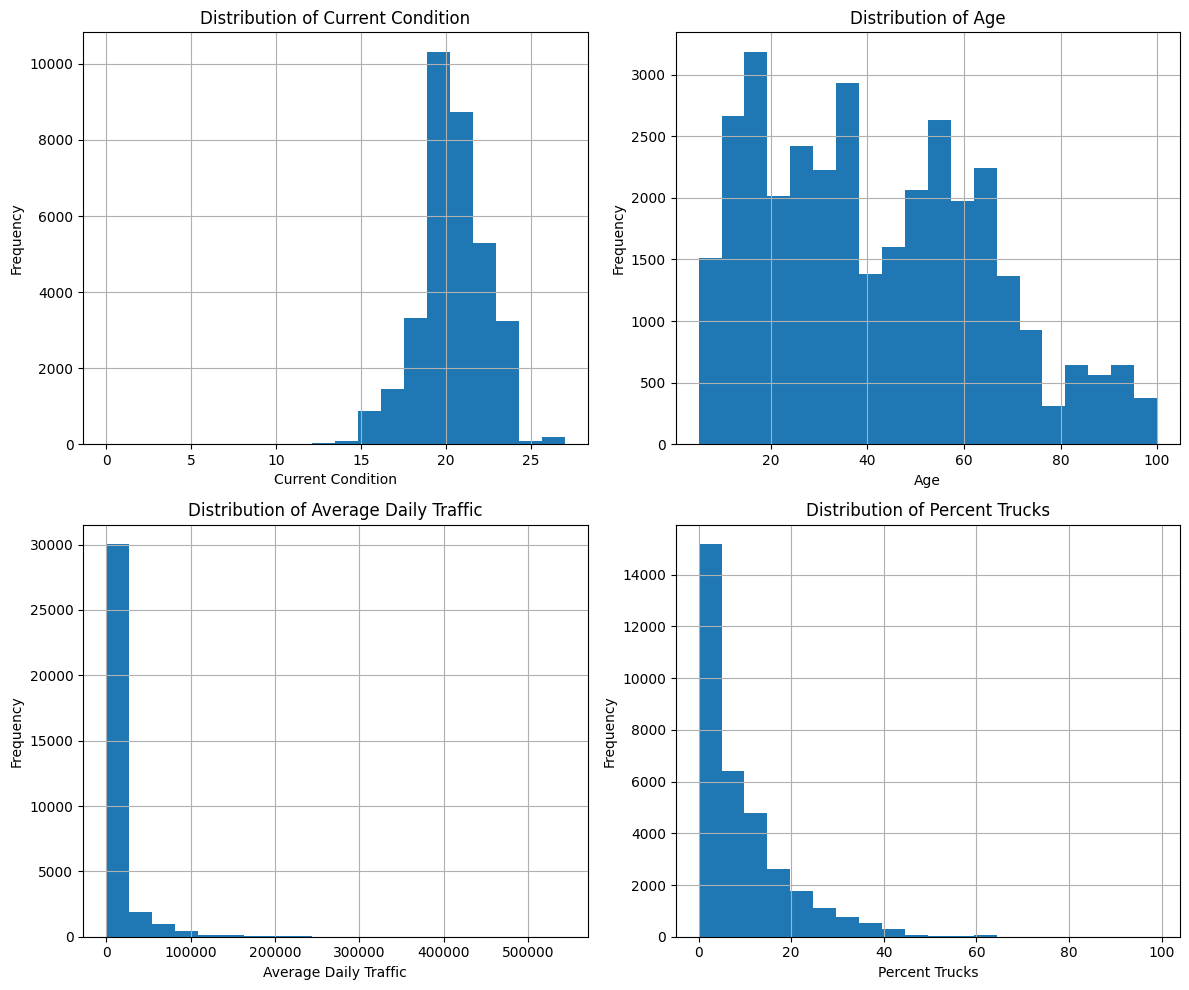

In [55]:
#Assuming target is normal 
#Highly skewed predictors - transformation? 

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for Current Condition
bridges_filtered_age['Current_condition'].hist(ax=axes[0, 0], bins=20)
axes[0, 0].set_title('Distribution of Current Condition')
axes[0, 0].set_xlabel('Current Condition')
axes[0, 0].set_ylabel('Frequency')

# Histogram for Age
bridges_filtered_age['Age'].hist(ax=axes[0, 1], bins=20)
axes[0, 1].set_title('Distribution of Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# Histogram for Average Daily Traffic
bridges_filtered_age['AverageDaily'].hist(ax=axes[1, 0], bins=20)
axes[1, 0].set_title('Distribution of Average Daily Traffic')
axes[1, 0].set_xlabel('Average Daily Traffic')
axes[1, 0].set_ylabel('Frequency')

# Histogram for Percent Trucks
bridges_filtered_age['Trucks_percent'].hist(ax=axes[1, 1], bins=20)
axes[1, 1].set_title('Distribution of Percent Trucks')
axes[1, 1].set_xlabel('Percent Trucks')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


#### (a) Continous Predictors vs Target
- Any linear or non-linear relationship between continous predictors (`Age`, `Average Daily`, and `Trucks_percent`) and `Current_condition` are visualised using scatter plots.

Text(0, 0.5, 'Current Condition')

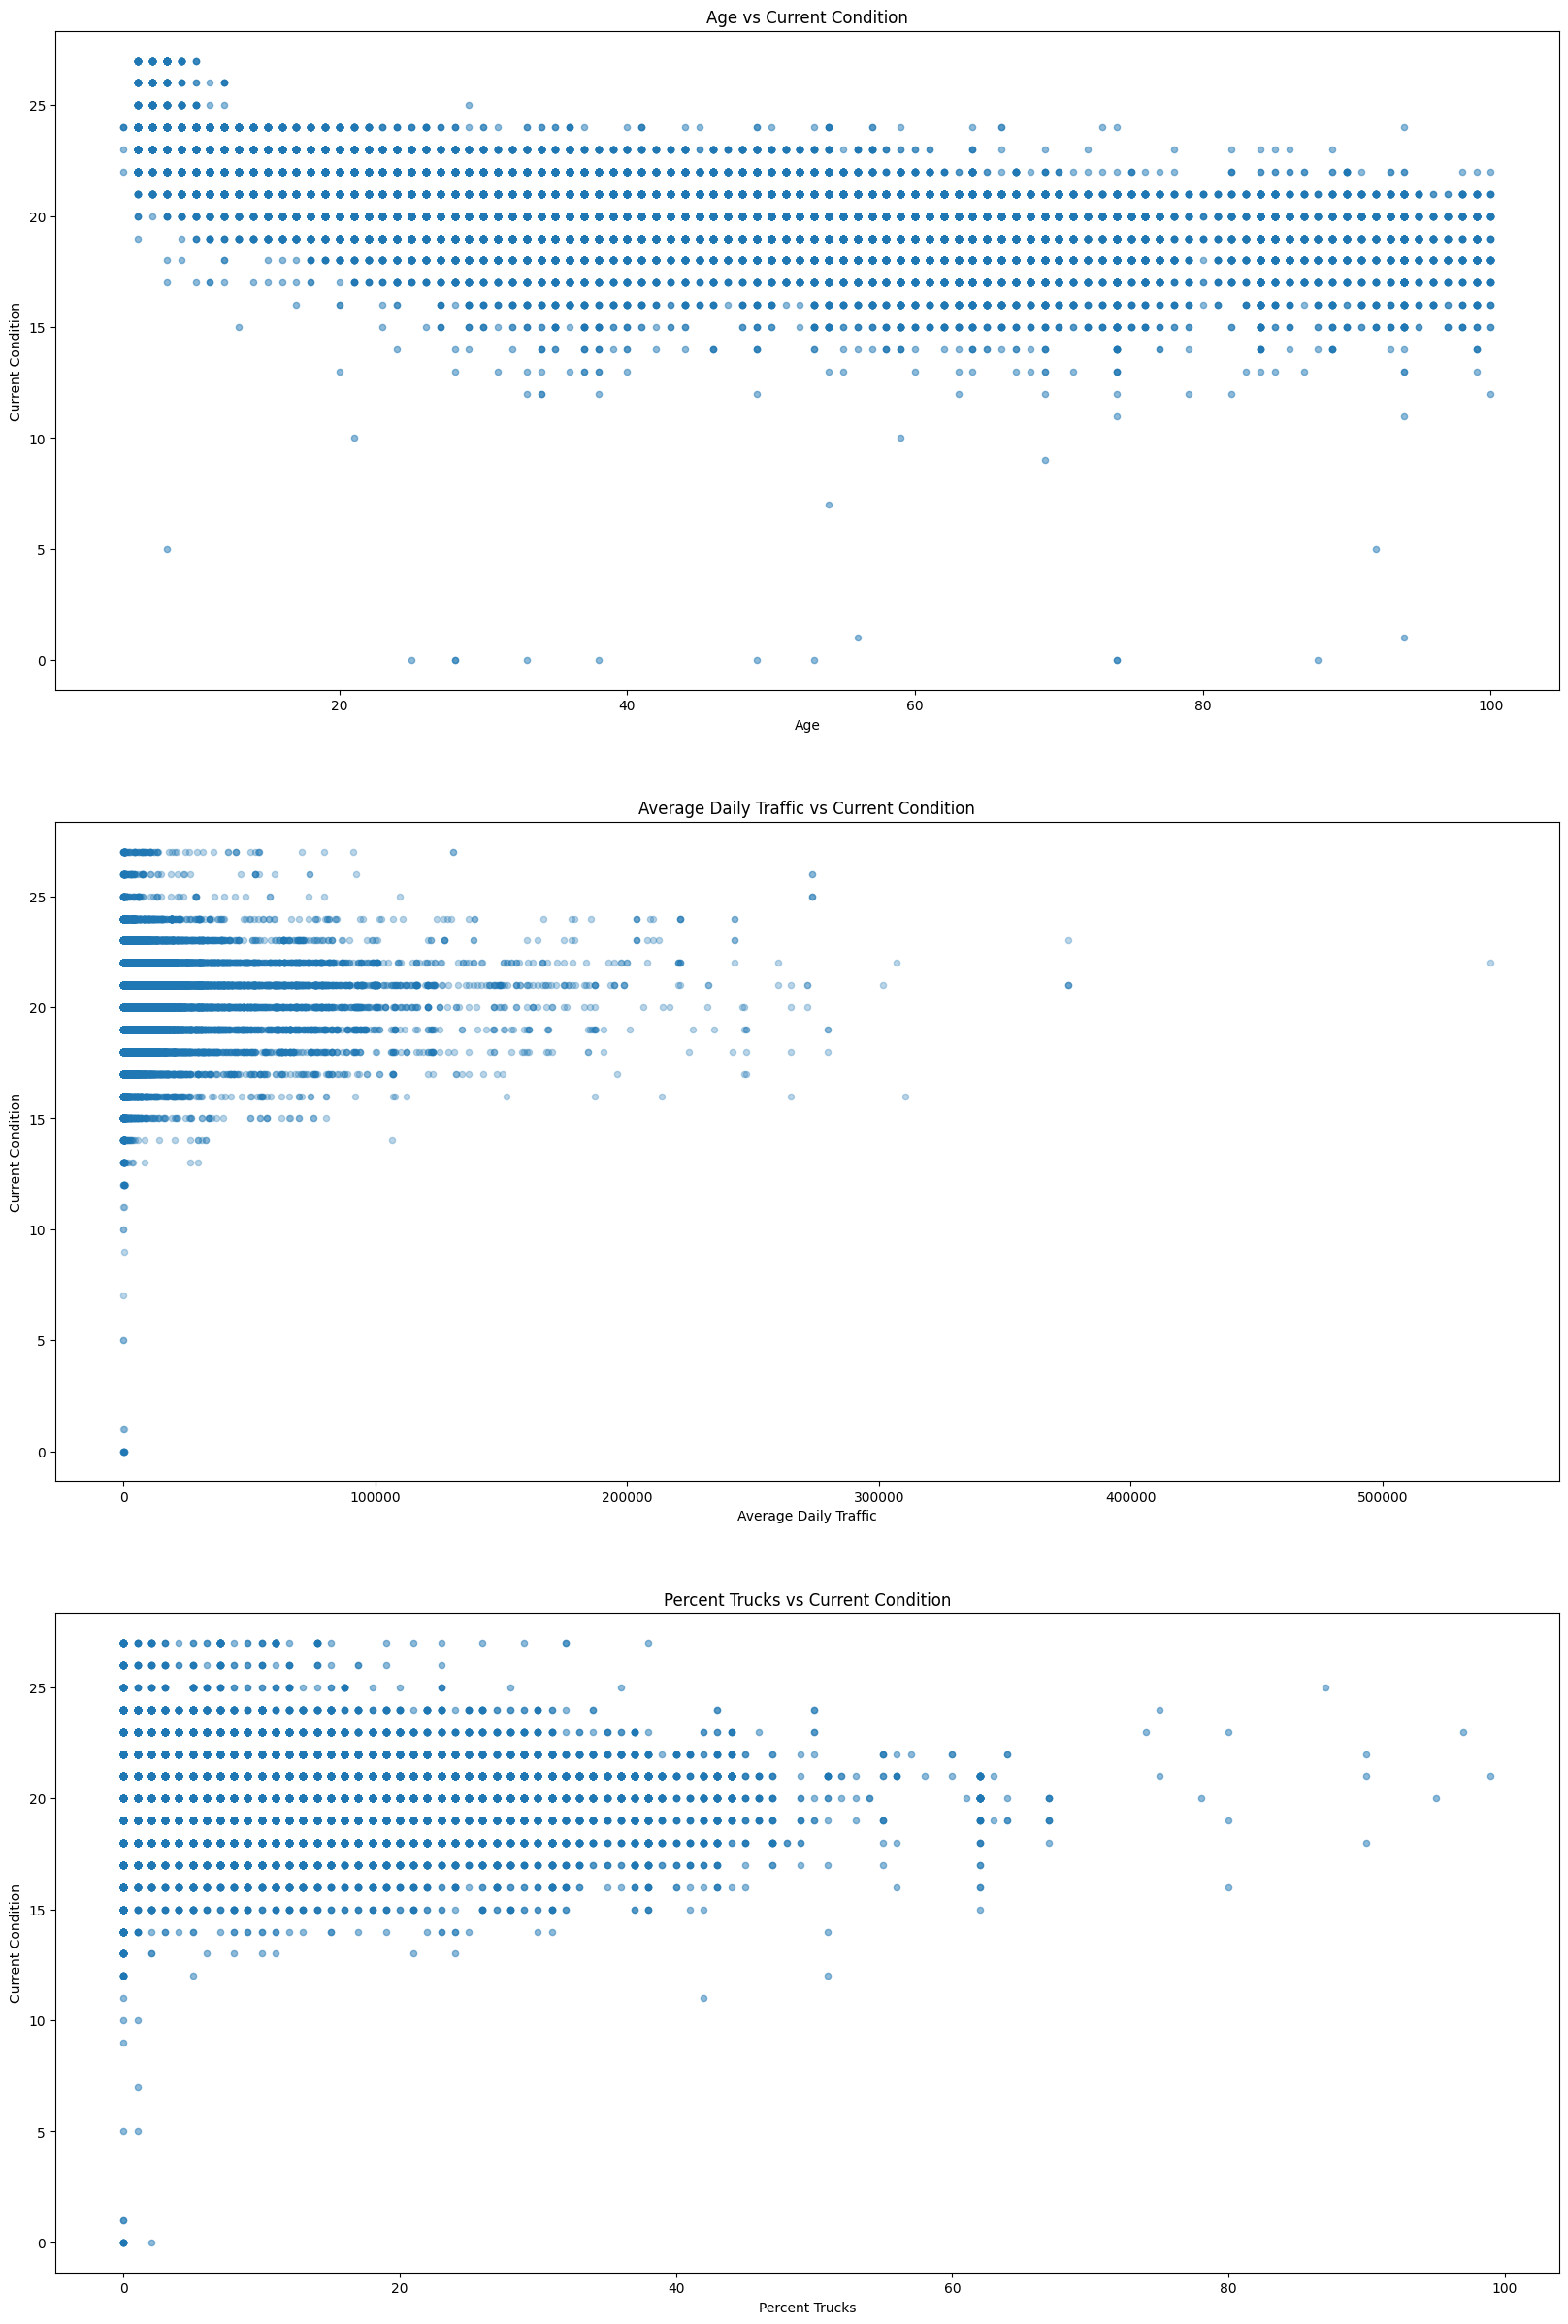

In [22]:

fig,((a1,a2,a3)) = plt.subplots(3, 1, figsize=(20, 30))

# Scatter Plot 1: Age vs Current Condition 
bridges_filtered_age.plot(kind='scatter', x='Age', y='Current_condition', alpha = 0.5, ax=a1)
a1.set_title('Age vs Current Condition')
a1.set_xlabel('Age')
a1.set_ylabel('Current Condition')

# Scatter Plot 2: Average Daily Traffic vs Current Condition 
bridges_filtered_age.plot(kind='scatter', x='AverageDaily', y='Current_condition', alpha = 0.3, ax=a2)
a2.set_title('Average Daily Traffic vs Current Condition')
a2.set_xlabel('Average Daily Traffic')
a2.set_ylabel('Current Condition')

# Scatter Plot 3: Percent Trucks vs Current Condition 
bridges_filtered_age.plot(kind='scatter', x='Trucks_percent', y='Current_condition', alpha= 0.5, ax=a3)
a3.set_title('Percent Trucks vs Current Condition')
a3.set_xlabel('Percent Trucks')
a3.set_ylabel('Current Condition')



- Correlation coefficients in a correlation matrix is used to measure the strength and direction of  the relationhsips
- heatmap visualisation

                        Age  AverageDaily  Trucks_percent  Current_condition
Age                1.000000     -0.049153        0.238289          -0.588520
AverageDaily      -0.049153      1.000000        0.022357           0.032369
Trucks_percent     0.238289      0.022357        1.000000          -0.051177
Current_condition -0.588520      0.032369       -0.051177           1.000000


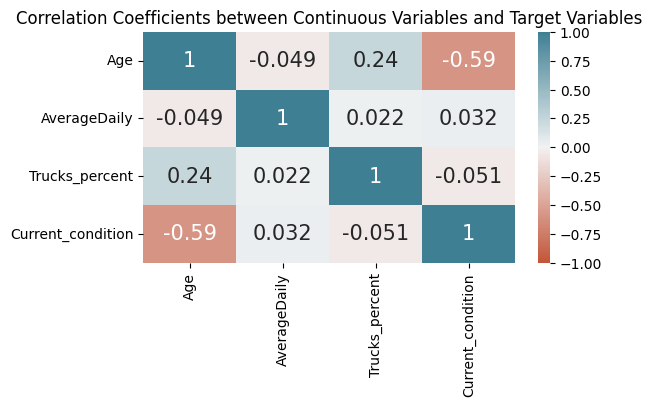

In [94]:
# Correlation matrix 
correlation_matrix = bridges_filtered_age[['Age', 'AverageDaily', 'Trucks_percent', 'Current_condition']].corr()
print(correlation_matrix)

# Heatmap 
plt.figure(figsize=(6, 3))
sns.heatmap (correlation_matrix,
            vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, annot_kws={"size": 15})

plt.title("Correlation Coefficients between Continuous Variables and Target Variables")
plt.show()

In [24]:
#2.2.2 Relationship between Continuous and Categorical Variables
#To explore the relationship between categorical and continuous variables, 
# we can use box plots or violin plots. These plots will help visualize 
# how the Current Condition varies across different categories of Material and Design

#### (b) Relationship between Continuous and Categorical Variables

Continous = current condition 
Categorical = material and design 

Bos plot

Text(0, 0.5, 'Current Condition')

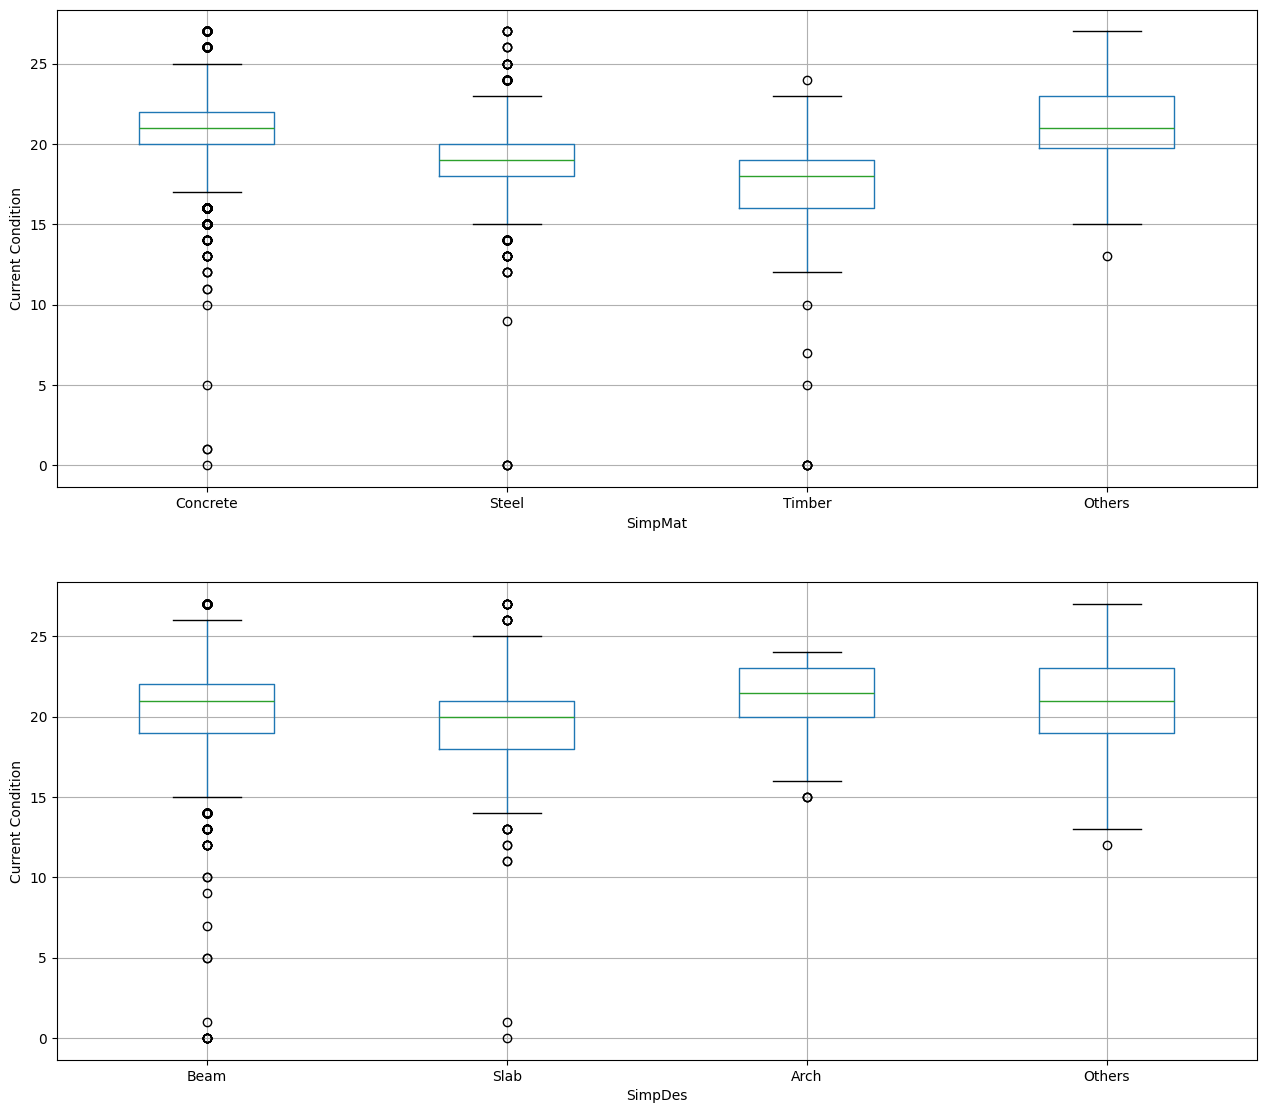

In [68]:
fig,(b1,b2) = plt.subplots(2,1, figsize=(15,14))

# Box plot 1: Material vs Current Condition
bridges_filtered_age.boxplot(column ='Current_condition', by='SimpMat', ax=b1)
# b1.set_xlabel('Simplified Material')
# b1.set_ylabel('Current Condition')

# Box plot 2: Design vs Current Condition
bridges_filtered_age.boxplot(column='Current_condition', by='SimpDes', ax=b2)
# b2.set_xlabel('Simplified Design')
# b2.set_ylabel('Current condition')

fig.suptitle('')
[b.set_title('') for b in [b1,b2]]
b1.set_ylabel('Current Condition')
b2.set_ylabel('Current Condition')

2.2.3 Relationship between Categorical Variables
To explore relationships between Material and Design, a contingency table (cross-tabulation) can be used, or a stacked bar plot can visualize the proportion of different categories of one variable against the other.

Contingency Table between Material and Design:

SimpDes    Beam  Slab  Arch  Others
SimpMat                            
Concrete  21560  4181    49     974
Steel      6048     0    51     301
Timber      464     0     0       0
Others        0     0    11      41


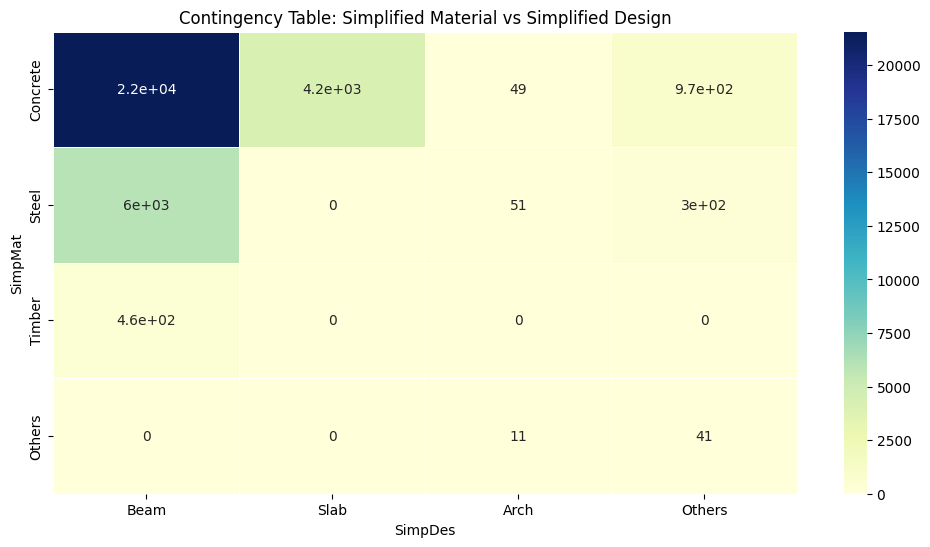

In [93]:
# Cross-tabulation between Material and Design
contingency_table = pd.crosstab(bridges_filtered_age['SimpMat'], bridges_filtered_age['SimpDes'])
print(contingency_table)

# Heatmap for visual representation of the contingency table
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Contingency Table: Simplified Material vs Simplified Design")
plt.show()



The following code looks at the relationship between two categorical variables, using cross tabulation which is similar to pivot. We can use the `crosstab` function in the following ways:

* We can normalise over all values creates a joint probability distribution. We can add totals to this, which show the marginal probability distribution of the two variables.
* We can normalise over the index. This makes all the rows sum to 1, giving probability of the variable on the x-axis, given the variable on the y-axis.
* To get the other conditional probability, we swap the parameters but still normalise the index. This seems better for plotting.
* Totals are not useful when normalising. If you include `margins=True` only the total on the unnormalised axis are given and they are not of interest.
* It is convenient to display the table as percentages. See how this is done.
* We do not want either totals or percentages for plotting.

In [90]:
# #Joint probabilities - normalise all values
# mat_and_des = pd.crosstab(bridges_filtered_age['SimpMat'], bridges_filtered_age['SimpDes'], normalize='all')
# des_and_mat = pd.crosstab(bridges_filtered_age['SimpDes'], bridges_filtered_age['SimpMat'], normalize='all')
# mat_and_des_tot = pd.crosstab(bridges_filtered_age['SimpMat'],bridges_filtered_age['SimpDes'], normalize='all', margins=True)

# #Conditional probabilites - normalise index 
# #first parameter is the index , which the is conditioniting variable
# mat_given_des = pd.crosstab(bridges_filtered_age['SimpDes'], bridges_filtered_age['SimpMat'], normalize='index')
# des_given_mat = pd.crosstab(bridges_filtered_age['SimpMat'], bridges_filtered_age['SimpDes'], normalize='index')

# # mat_and_des_tot.round(4)
# # mat_and_des.round(4)
# # mat_given_des.round(4)
# # des_given_mat.round(4)

In [91]:
# #Plotting probability distributions (bar chart) 
# fig,(c1, c2, c3, c4) = plt.subplots(4,1,figsize=(15,25), sharey=False, sharex=False)
# fig.subplots_adjust(hspace=0.35)

# # Bar Chart 1: Joint Probability of Material and Design
# mat_and_des.plot(kind='bar', subplots=False, ax=c1, rot=0) 
# c1.set_title('Joint Probability of Material and Design', fontsize=14)

# # Bar Chart 2: Joint Probability of Design and Material
# des_and_mat.plot(kind='bar', subplots=False, ax=c2, rot=0)
# c2.set_title('Joint Probability of Design and Material', fontsize=14)

# # Bar Chart 3: Probability of Material given Design
# mat_given_des.plot(kind='bar', subplots=False, ax=c3, rot=0)
# c3.set_title('Probability of Materials, given Design', fontsize=14)

# # Bar Chart 4: Probability of Design given Material
# des_given_mat.plot(kind='bar', subplots=False, ax=c4, rot=0)
# c4.set_title('Probability of Design, given Material', fontsize=14)

2.2.4 Preliminary Conclusions
After exploring the relationships between the predictor variables and the target, you can begin drawing some preliminary conclusions. Consider these points:

Do any strong relationships exist between the predictors and the current condition?
For example, does Age or Average Daily Traffic have a strong correlation with the bridge condition?
What is the impact of the categorical variables?
For instance, does the Material of the bridge or its Design significantly influence the bridge's condition?
What is the relationship between the predictor variables themselves?
Are there any signs of multicollinearity (strong relationships between predictors) that might affect regression analysis?
Preliminary Insights
The correlation matrix and scatter plots will reveal whether continuous predictors like Age or Average Daily Traffic show strong relationships with the Current Condition.
The box plots for Material and Design will help understand whether certain materials or designs lead to significantly better or worse bridge conditions.
The contingency table will give insights into whether certain combinations of materials and designs are more prevalent.


1. How well can these variables predict the current condition of bridges?
2. Which variables have the greatest influence on the current condition?

### Preliminary Analysis and Answers to Key Questions

#### Relationship Between Variables and Current Condition

1. **Age vs. Current Condition**:
   - The scatter plot and correlation matrix show a **strong negative correlation** between **Age** and **Current Condition** (correlation coefficient of **-0.59**). This indicates that older bridges are more likely to be in worse condition.
   - **Age** is therefore a significant predictor of the current condition.

2. **Average Daily Traffic vs. Current Condition**:
   - The scatter plot shows a very **weak positive correlation** (correlation coefficient of **0.032**). There is no strong evidence that **Average Daily Traffic** influences the current condition in this dataset.
   - **Average Daily Traffic** does not seem to be a significant predictor of bridge condition.

3. **Percent Trucks vs. Current Condition**:
   - There is a **weak negative correlation** (correlation coefficient of **-0.051**) between **Percent Trucks** and **Current Condition**. The data shows no strong pattern indicating that the presence of more trucks significantly impacts bridge condition.
   - Like traffic, **Percent Trucks** does not appear to be a strong predictor of current condition.

4. **Material vs. Current Condition**:
   - The box plot shows that bridges made of **Concrete** and **Steel** tend to have higher condition scores compared to those made of **Timber** or **Other** materials. **Concrete** in particular shows a consistently better condition.
   - **Material** is an important factor in predicting the current condition of a bridge, with **Concrete** and **Steel** being associated with better conditions.

5. **Design vs. Current Condition**:
   - The box plot indicates that bridges with **Beam** or **Slab** designs generally have better current condition scores, while **Arch** and **Other** designs are associated with more variability in condition.
   - **Design** also plays a key role, with **Beam** and **Slab** designs being better predictors of good condition.

6. **Contingency Table (Material and Design)**:
   - The contingency table and heatmap show that **Concrete** is predominantly used with **Beam** and **Slab** designs, which are also associated with better bridge conditions.
   - **Steel** is also used frequently with **Beam** designs. Other materials like **Timber** and **Others** are used less frequently and tend to be associated with worse bridge conditions.
   - There is a strong relationship between **Material** and **Design**, with **Concrete** and **Beam** being the dominant combination.

#### Answers to Key Questions

1. **How well can these variables predict the current condition of a bridge?**
   - **Age** is the best predictor of the current condition. Older bridges are more likely to be in worse condition, as shown by the strong negative correlation between **Age** and **Current Condition**.
   - **Material** and **Design** are also good predictors. Bridges made of **Concrete** and **Steel** and those with **Beam** or **Slab** designs tend to be in better condition.
   - **Average Daily Traffic** and **Percent Trucks** do not have a significant influence on the current condition, based on the weak correlations observed in the data.

2. **Which variables have the greatest influence on current condition?**
   - **Age** has the greatest influence on the current condition, showing the strongest negative correlation.
   - **Material** and **Design** also have significant influence, with **Concrete** and **Beam** combinations being associated with better bridge conditions.
   - **Average Daily Traffic** and **Percent Trucks** appear to have little impact on the current condition based on the available data.

### Summary:
- **Age** is the most influential variable affecting bridge condition, followed by **Material** and **Design**.
- **Concrete** and **Beam** bridges tend to be in the best condition, while bridges made from other materials or using other designs show more variability in condition.
- The data suggests that **traffic** (both average daily and percent trucks) is not a major factor in predicting bridge condition.
